### Imports

In [80]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mog_model import *
from matplotlib import gridspec
from utils.plot_helper import errorbar_plot
plt.style.use('/Users/saforem2/.config/matplotlib/stylelib/dark_jupyter.mplstyle')

plt.rc('text', usetex=False)
plt.rcParams['errorbar.capsize'] = 0
%matplotlib notebook
%autoreload 2

run_dir = '../log_mog_tf/run_22_237/'
data_dir = run_dir + 'run_info/'
figs_dir = run_dir + 'figures1/'
if not os.path.exists(figs_dir):
    os.makedirs(figs_dir)

#### Helper functions

In [81]:
def pkl_loader(_dir, _file):
    with open(_dir + _file, 'rb') as f:
        _data = pickle.load(f)
    return _data

def load_data(data_dir):
    _d = {}
    data = {}
    for file in os.listdir(data_dir):
        if file.endswith('.pkl'):
            key = file[:-4]
            _d[key] = pkl_loader(data_dir, file)
        for key, val in _d.items():
            data[key] = val
    return data

In [82]:
def fix_legends(axes):
    if isinstance(axes, (np.ndarray, list)):
        legends = [ax.get_legend() for ax in axes]
        for leg in legends:
            leg.texts[0].set_color('w')
    else:
        legend = axes.get_legend()
        for idx in range(len(legend.texts)):
            legend.texts[idx].set_color('w')
    return axes

In [83]:
def add_vline(axes, x, **kwargs):
    if isinstance(axes, (np.ndarray, list)):
        for ax in axes:
            ax.axvline(x, **kwargs)
                       #, color='C3', ls=':', lw=2.)
    else:
        axes.axvline(x, **kwargs)
    return axes

In [84]:
def fix_ticks(axes):
    if isinstance(axes, (np.ndarray, list)):
        for idx in range(len(axes)):
            axes[idx].tick_params(which='both', color='#474747', labelcolor='k')
    else:
        axes.tick_params(which='both', color='#474747', labelcolor='k')

### Define data_dir and load data

In [86]:
data = load_data(data_dir)

get_vals_as_arr = lambda _dict: np.array(list(_dict.values()))

tr0 = get_vals_as_arr(data['tunneling_rates'])
tr1 = get_vals_as_arr(data['tunneling_rates_highT'])
ar0 = get_vals_as_arr(data['acceptance_rates'])
ar1 = get_vals_as_arr(data['acceptance_rates_highT'])
d0 = get_vals_as_arr(data['distances'])
d1 = get_vals_as_arr(data['distances_highT'])

steps_arr = []
temp_arr = []
for key in data['tunneling_rates_highT'].keys():
    steps_arr.append(key[0]+1)
    temp_arr.append(key[1])

In [87]:
x_steps = 3 * [steps_arr]
x_temps = 3 * [temp_arr]

y_data = [tr0[:, 0], ar0[:, 0], d0[:, 0]]
y_err = [tr0[:, 1], ar1[:, 1], d1[:, 1]]

y_data_highT = [tr1[:, 0], ar1[:, 0], d1[:, 0]]

y_err_highT = [tr1[:, 1], ar1[:, 1], d1[:, 1]]

str0 = (f"{data['_params']['num_distributions']} in {data['_params']['x_dim']} dims; ")
str1 = (r'$\mathcal{N}_{\hat \mu}(\sqrt{2}\hat \mu;$'
        + r'${{{0}}}),$'.format(data['_params']['sigma']))
title = str0 + str1 + r'$T_{trajectory} = 1$'
title_highT = str0 + str1 + r'$T_{trajectory} > 1$'
def out_file(f): return figs_dir + f'{f}.pdf'

kwargs = {
    'fillstyle': 'full',
    'markersize': 3,
    'alpha': 1.,
    'capsize': 0,
    'capthick': 0,
    'x_label': 'Training step',
    'y_label': '',
    'legend_labels': ['Tunneling rate',
                      'Acceptance rate',
                      'Distance / step'],
    'title': title,
    'grid': True,
    'reverse_x': False,
}

### $(T = 1)$ Tunneling rate, Acceptance Rate and Avg. Distance vs. Training Step 

In [88]:
%matplotlib notebook

<IPython.core.display.Javascript object>


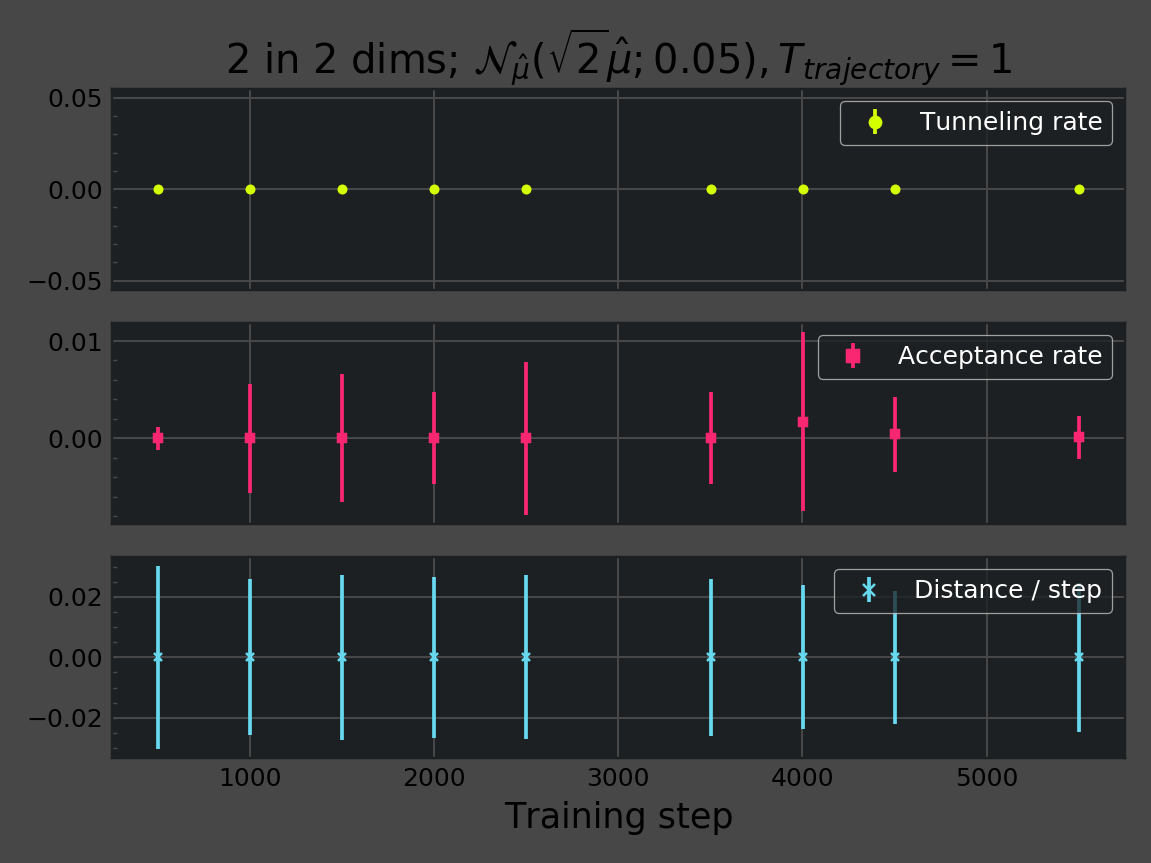

Saving figure to: ../log_mog_tf/run_22_237/figures1/tr_ar_dist_steps_lowT.pdf


In [89]:
out_file0 = out_file('tr_ar_dist_steps_lowT')#, step)
fig, axes = errorbar_plot(x_steps, y_data, y_err, out_file=out_file0, **kwargs)
_ = fix_legends(axes)
_ = fix_ticks(axes)
sfig = fig.savefig(out_file0, dpi=400, bbox_inches='tight')

### $(T > 1)$ Tunneling rate, Acceptance Rate and Avg. Distance vs. Training Step 

<IPython.core.display.Javascript object>


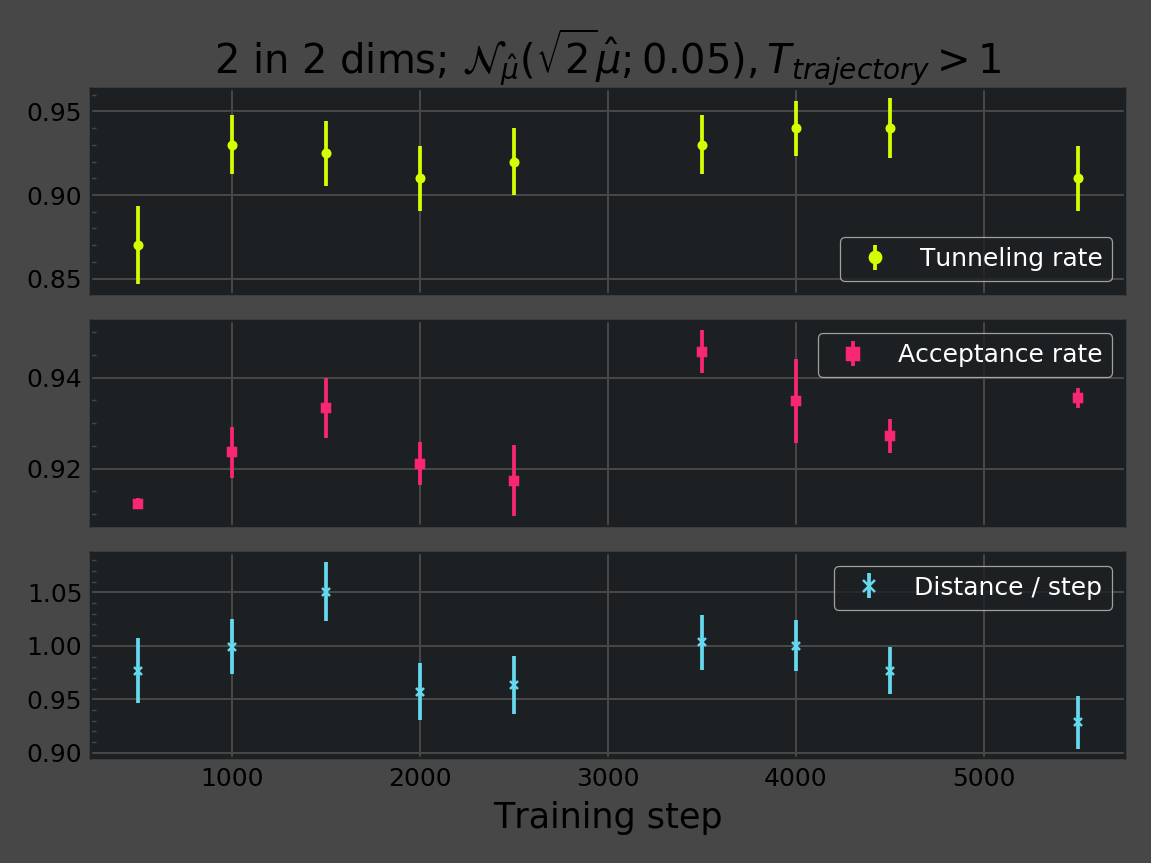

Saving figure to: ../log_mog_tf/run_22_237/figures1/tr_ar_dist_steps_highT.pdf


In [90]:
# for trajectories with temperature > 1 vs. STEP
out_file1 = out_file('tr_ar_dist_steps_highT')#, step)
kwargs1 = kwargs.copy()
kwargs1['title'] = title_highT
fig, axes = errorbar_plot(x_steps, y_data_highT, y_err_highT,
              out_file=out_file1, **kwargs1)
axes = fix_legends(axes)
_ = fix_ticks(axes)
fig.savefig(out_file1, dpi=400, bbox_inches='tight')

### $(T = 1)$ Tunneling rate, Acceptance Rate and Avg. Distance vs. Temperature

<IPython.core.display.Javascript object>


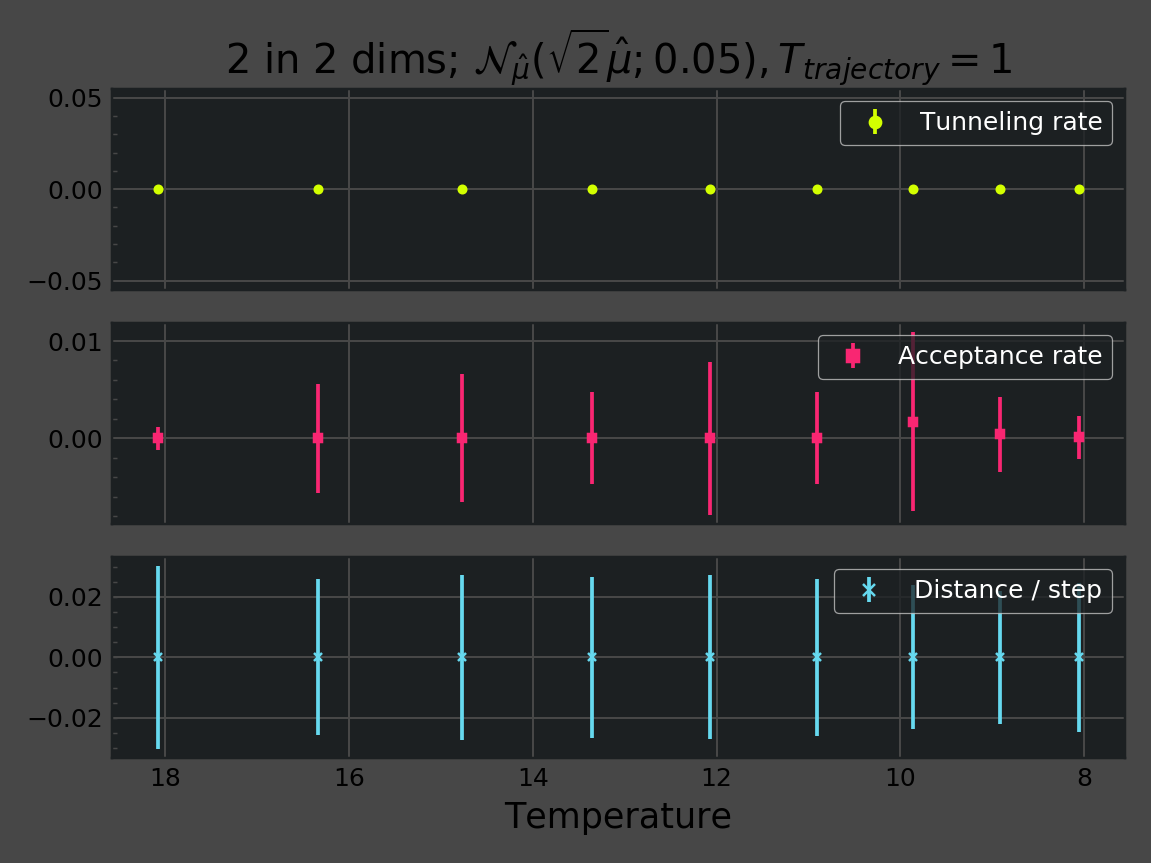

Saving figure to: ../log_mog_tf/run_22_237/figures1/tr_ar_dist_temps_lowT.pdf


In [91]:
out_file2 = out_file('tr_ar_dist_temps_lowT')#, step)
# for trajectories with temperature = 1. vs TEMP
kwargs2 = kwargs.copy()
kwargs2['x_label'] = 'Temperature'
kwargs2['title'] = title
kwargs2['reverse_x'] = True
fig, axes = errorbar_plot(x_temps, y_data, y_err,
                          out_file=out_file2, **kwargs2)
_ = fix_legends(axes)
_ = fix_ticks(axes)
_ = add_vline(axes, 1, **{'color': 'C6', 'ls': '-', 'lw': 2.})
#axes[-1].set_xlim((15, 0.5))
fig.savefig(out_file2, dpi=400, bbox_inches='tight')
#ax.set_xlim(15, 1.05)

### $(T > 1)$ Tunneling rate, Acceptance Rate and Avg. Distance vs. Temperature

<IPython.core.display.Javascript object>


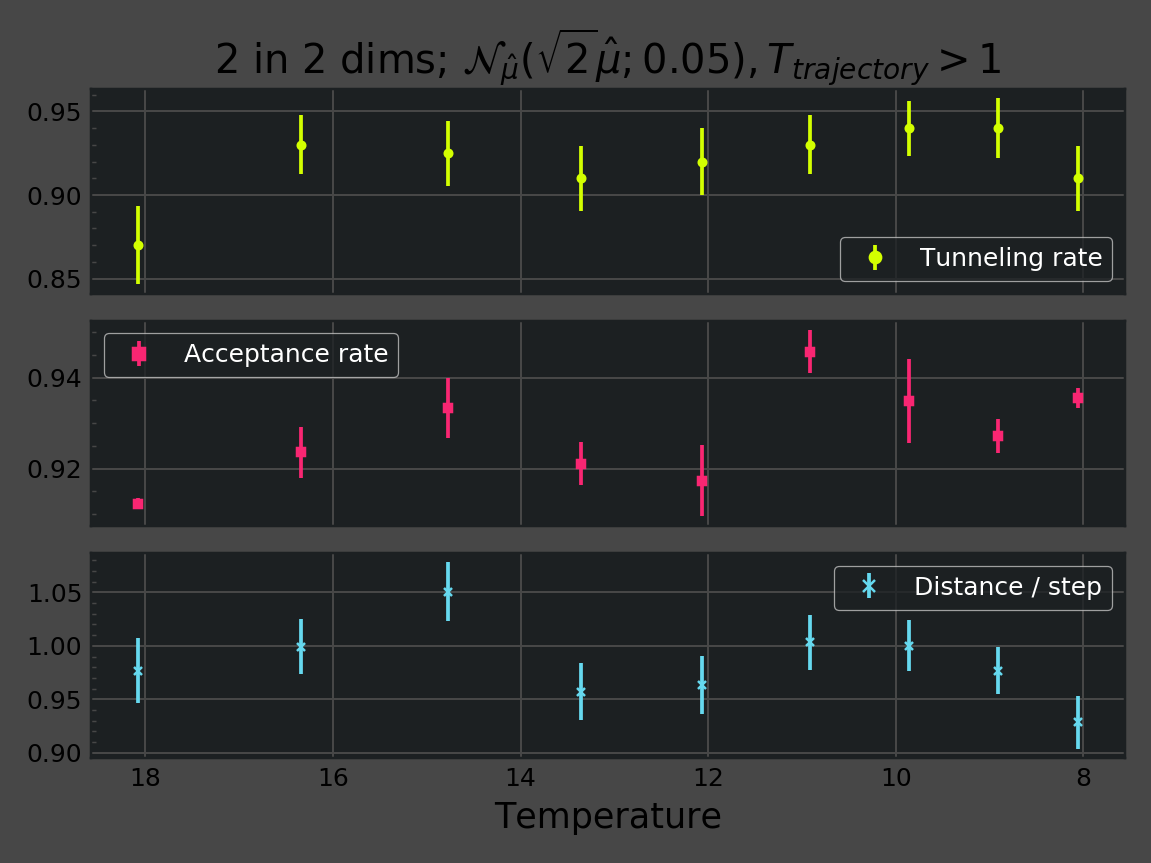

Saving figure to: ../log_mog_tf/run_22_237/figures1/tr_ar_dist_temps_highT.pdf


In [92]:
out_file3 = out_file('tr_ar_dist_temps_highT')#, step)
# for trajectories with temperature > 1. vs TEMP
kwargs3 = kwargs.copy()
kwargs3['title'] = title_highT
kwargs3['x_label'] = 'Temperature'
kwargs3['reverse_x'] = True
fig, axes = errorbar_plot(x_temps, y_data_highT, y_err_highT,
                        out_file=out_file3, **kwargs3)
_ = add_vline(axes, 1, **{'color': 'C6', 'ls': '-', 'lw': 2.})
    
axes = fix_legends(axes)
_ = fix_ticks(axes)
fig.savefig(out_file3, dpi=400, bbox_inches='tight')
#axes[-1].set_xlim(10, 0.9)

### Annealing Schedule

In [114]:
temp0 = data['_params']['temp_init']
steps = np.arange(0, max(steps_arr))
annealing_factor = data['_params']['annealing_factor']
annealing_steps = data['_params']['annealing_steps']
tunneling_steps = data['_params']['tunneling_rate_steps']
fixed_temps = []
fixed_steps = []
temp = temp0
for step in steps:
    if step % annealing_steps == 0:
        tt  = temp * annealing_factor
        if tt > 1:
            temp = tt
    if (step+1) % tunneling_steps == 0:
        fixed_steps.append(step+2)
        fixed_temps.append(temp)

<IPython.core.display.Javascript object>


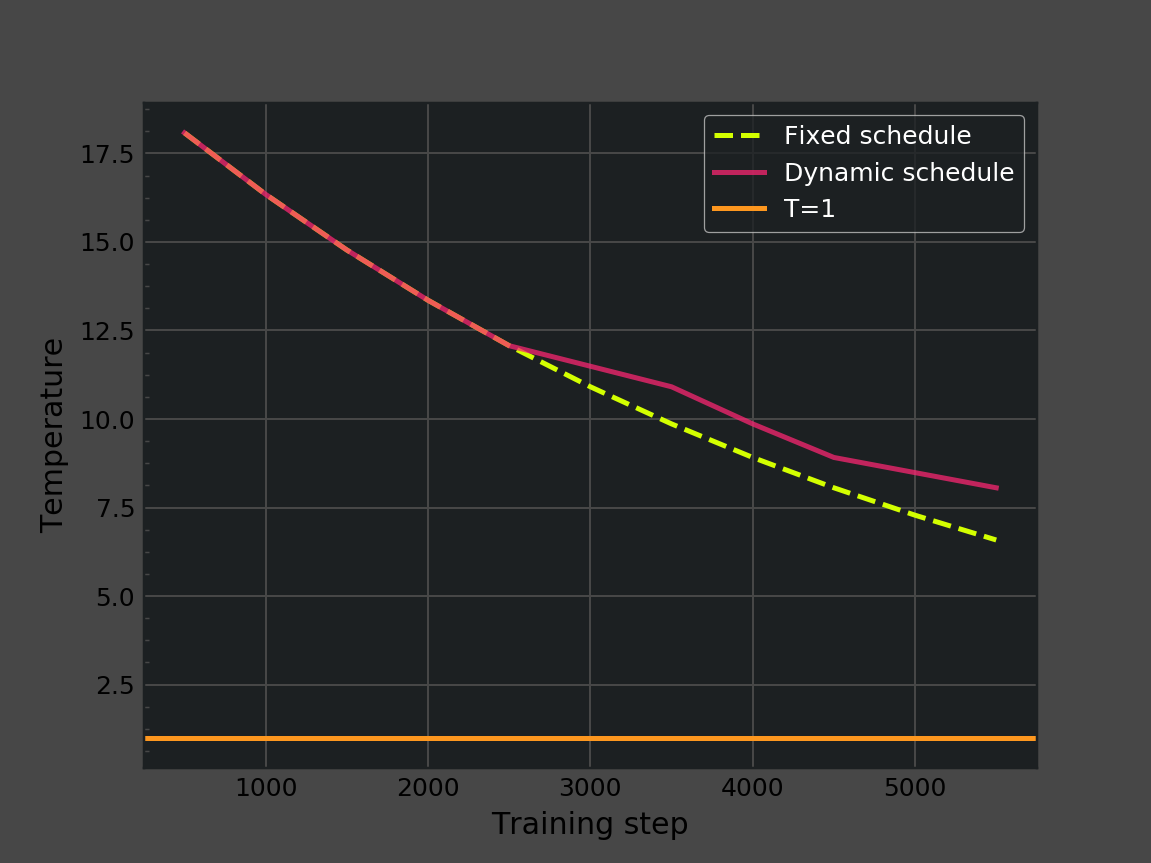

In [115]:
plt.style.use('/Users/saforem2/.config/matplotlib/stylelib/dark_jupyter.mplstyle')
fig, ax = plt.subplots()
pt = ax.plot(fixed_steps, fixed_temps, ls='--', label='Fixed schedule', lw=2)
pt = ax.plot(steps_arr, temp_arr, label='Dynamic schedule', lw=2., alpha=0.75)
hl = ax.axhline(y=1., color='C6', ls='-', lw=2., label='T=1')
xl = ax.set_xlabel('Training step')
yl = ax.set_ylabel('Temperature')
lg = ax.legend(loc='best')
_ = fix_legends(ax)
#ylabels = ax.get_yticklabels()
#xlabels = ax.get_xticklabels()
#ax.set_yticklabels(ylabels, {'color': 'k'})
#ax.set_xticklabels(xlabels, {'color': 'k'})
#ax.set_yticklabels(ax.get_yticklabels(), {'color': 'k'})
#ax.set_xticklabels(ax.get_xticklabels(), {'color': 'k'})
_ = fix_ticks(ax)

plt.savefig(figs_dir + 'annealing_schedule.pdf', dpi=400, bbox_inches='tight')

In [111]:
for i in range(len(fixed_steps)):
    print(f'({fixed_steps[i]}, {fixed_temps[i]:.3g})\t'
          f'({steps_arr[i]}, {temp_arr[i]:.3g})')

(501, 16.3)	(501, 18.1)
(1001, 14.8)	(1001, 16.3)
(1501, 13.4)	(1501, 14.8)
(2001, 12.1)	(2001, 13.4)
(2501, 10.9)	(2501, 12.1)
(3001, 9.86)	(3501, 10.9)
(3501, 8.91)	(4001, 9.86)
(4001, 8.06)	(4501, 8.91)
(4501, 7.28)	(5501, 8.06)


IndexError: list index out of range